In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Data01.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [9]:
df = df.drop(['CustomerID','Gender'],1)

In [10]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [11]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [12]:
df_scaled.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [13]:
df_scaled[np.abs(df_scaled['Annual Income (k$)']) >3]

,Age,Annual Income (k$),Spending Score (1-100)


In [14]:
kmeans = KMeans()

In [15]:
err = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(df_scaled)
    model.inertia_
    err.append(model.inertia_)

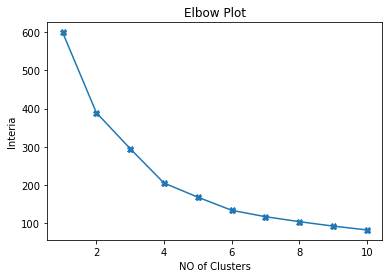

In [16]:
plt.plot(range(1,11),err,marker='X')
plt.xlabel('NO of Clusters')
plt.ylabel('Interia')
plt.title('Elbow Plot')
plt.show()

In [17]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(df_scaled)
    sil_score = silhouette_score(df_scaled,kmeans.labels_)
    print('The silhouette_score for', i , 'clusters is', sil_score)

The silhouette_score for 2 clusters is 0.33547192894004574
The silhouette_score for 3 clusters is 0.3589575717698723
The silhouette_score for 4 clusters is 0.4039582785148566
The silhouette_score for 5 clusters is 0.41664341513732767
The silhouette_score for 6 clusters is 0.4284167762892593
The silhouette_score for 7 clusters is 0.4211546112021424
The silhouette_score for 8 clusters is 0.4109827482212367
The silhouette_score for 9 clusters is 0.4197101195970278


Inference : Based on silhouette_score, we can consider 4 & 6 are optimal number of clusters

for K = 4

In [19]:
kmeans = KMeans(n_clusters=4,random_state=100)
model4 = kmeans.fit(df_scaled)
lables4 = model4.labels_
df_4 = df_scaled.copy()
df_4['labels'] = lables4

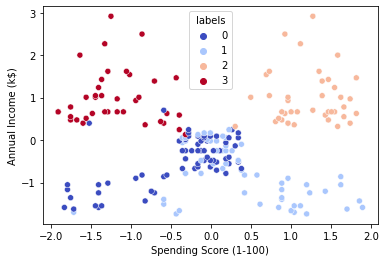

In [20]:
sns.scatterplot('Spending Score (1-100)','Annual Income (k$)',hue='labels',data=df_4,palette='coolwarm')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=6,random_state=100)
model6 = kmeans.fit(df_scaled)
lables6 = model6.labels_
df_6 = df_scaled.copy()
df_6['labels'] = lables6

In [22]:
df_6.head()

,Age,Annual Income (k$),Spending Score (1-100),labels
0,-1.424569,-1.738999,-0.434801,3
1,-1.281035,-1.738999,1.195704,3
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,3
4,-0.563369,-1.662660,-0.395980,1


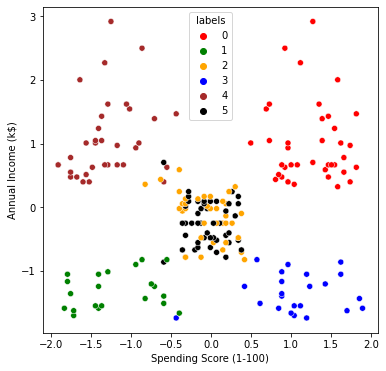

In [23]:
plt.figure(figsize=(6,6))
sns.scatterplot('Spending Score (1-100)','Annual Income (k$)',hue='labels',data=df_6,palette=['red','green','orange','blue','brown','black'])
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5,random_state=100)
model5 = kmeans.fit(df_scaled)
lables5 = model5.labels_
df_5 = df_scaled.copy()
df_5['labels'] = lables5

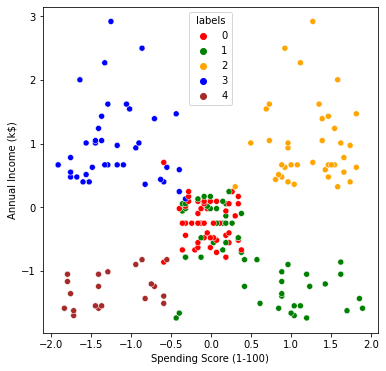

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot('Spending Score (1-100)','Annual Income (k$)',hue='labels',data=df_5,palette=['red','green','orange','blue','brown'])
plt.show()